In [1]:
!pip install tensorflow

In [6]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import fashion_mnist

In [7]:
# Step 2: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Step 3: Data Exploration
# Display the shape of the datasets
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels: (60000,)
Testing data shape: (10000, 28, 28), Labels: (10000,)


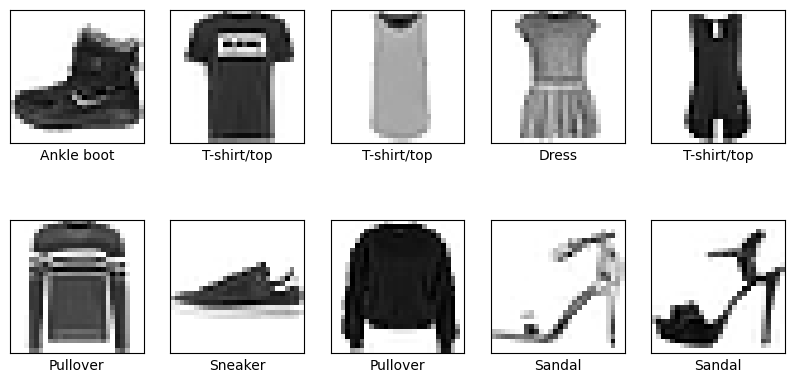

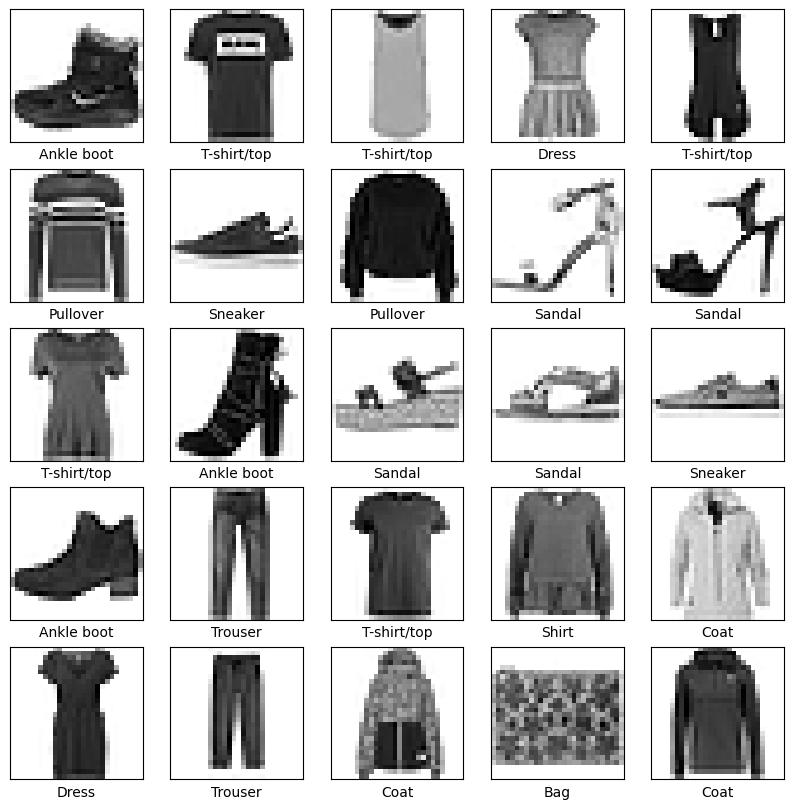

In [9]:
# Display some sample images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
# Step 4: Data Preprocessing
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Reshape the data to add a channel dimension for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [12]:
# Step 5: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [14]:
# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6707 - loss: 0.8928 - val_accuracy: 0.8547 - val_loss: 0.4019
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8346 - loss: 0.4580 - val_accuracy: 0.8729 - val_loss: 0.3407
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.8582 - loss: 0.3941 - val_accuracy: 0.8792 - val_loss: 0.3185
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.8676 - loss: 0.3653 - val_accuracy: 0.8923 - val_loss: 0.2932
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.8757 - loss: 0.3430 - val_accuracy: 0.8975 - val_loss: 0.2741
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8815 - loss: 0.3260 - val_accuracy: 0.9005 - val_loss: 0.2703
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.8878 - loss: 0.3056 - val_accuracy: 0.9037 - val_loss: 0.2614
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8891 -

In [15]:
# Step 8: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9009 - loss: 0.2679
Test accuracy: 0.90


In [26]:
# Save the model
model.save('fashion_mnist_cnn_model.keras')
print("Model saved as fashion_mnist_cnn_model.keras")

Model saved as fashion_mnist_cnn_model.keras


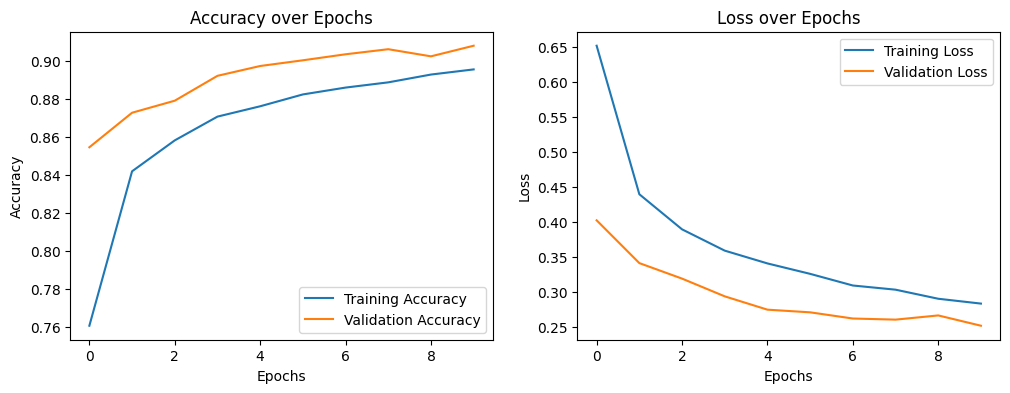

In [16]:
# Step 9: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


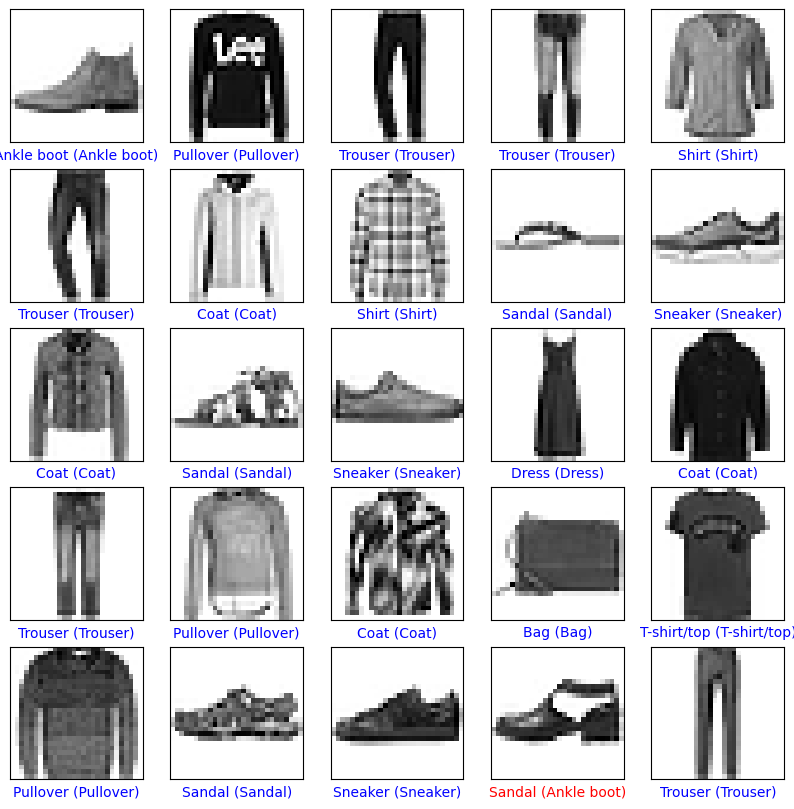

In [23]:
# Step 10: Make predictions and visualize
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()

In [18]:
# Step 11: Display prediction table for visual inspection
import pandas as pd

In [19]:
# Create a table with predictions and actual labels
num_samples = 20
sample_indices = np.random.choice(range(len(x_test)), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_predictions = predictions[sample_indices]
sample_true_labels = y_test[sample_indices]
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

In [20]:
# Prepare the table data
data = []
for i in range(num_samples):
    data.append({
        "Image": sample_images[i].reshape(28, 28),
        "True Label": class_names[sample_true_labels[i]],
        "Predicted Label": class_names[sample_predicted_labels[i]],
        "Confidence": np.max(sample_predictions[i])
    })

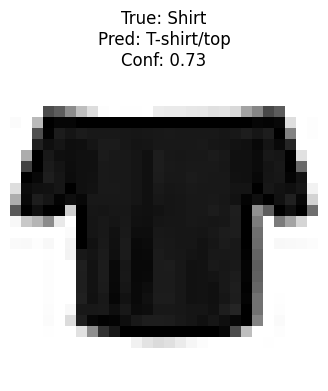

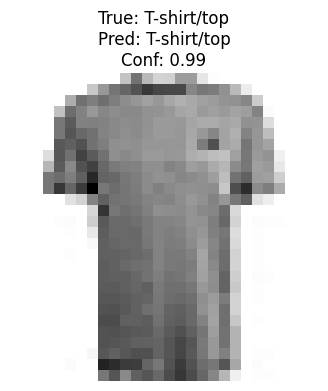

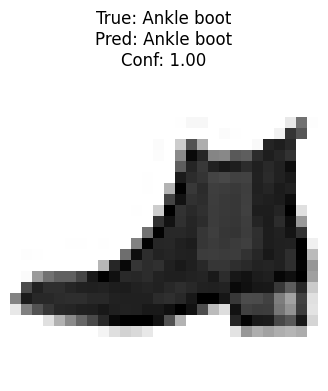

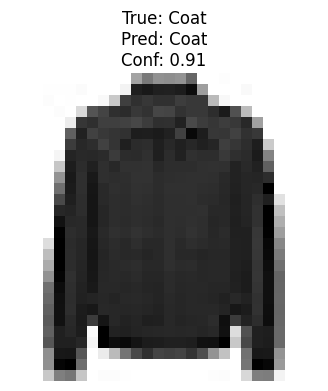

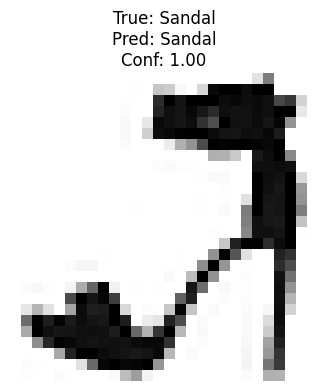

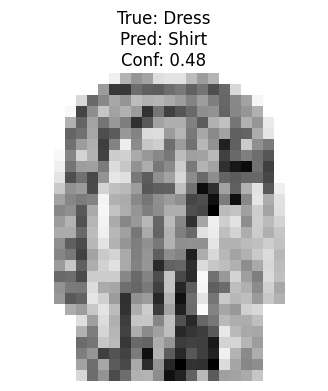

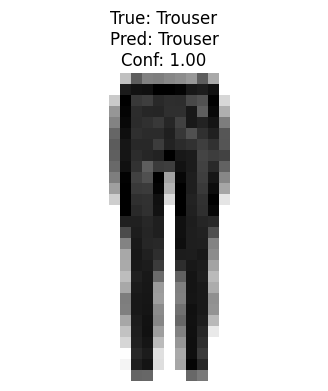

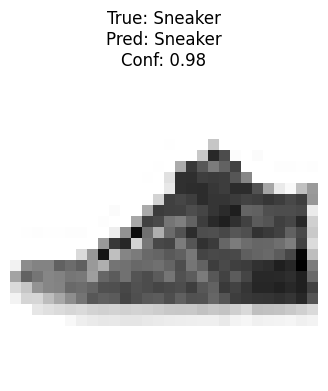

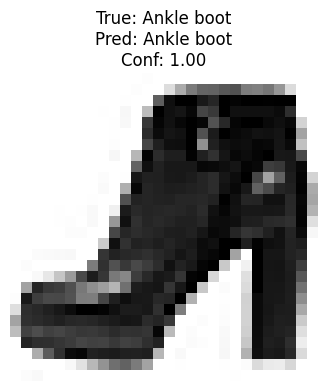

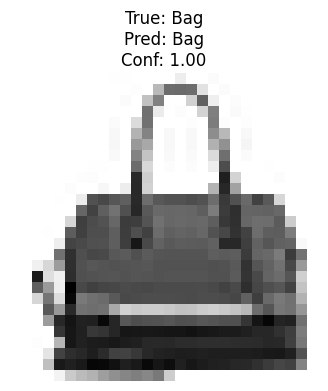

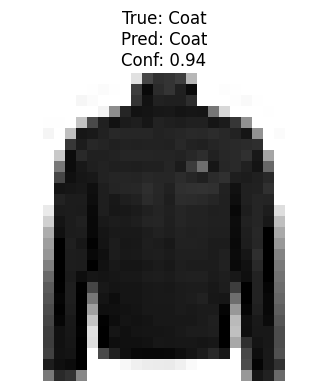

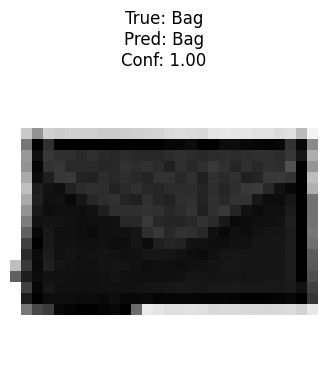

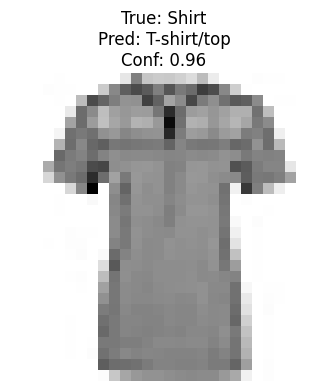

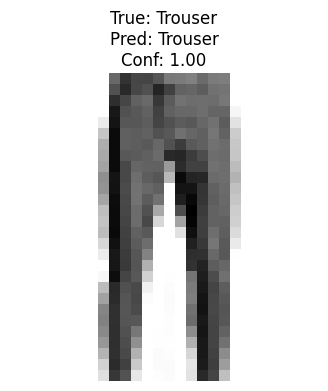

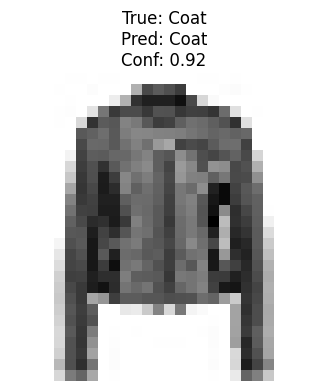

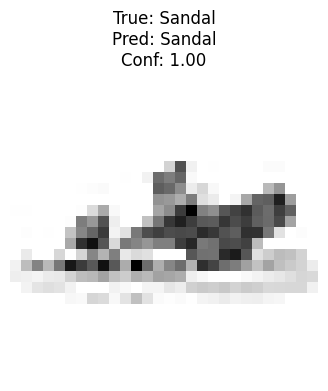

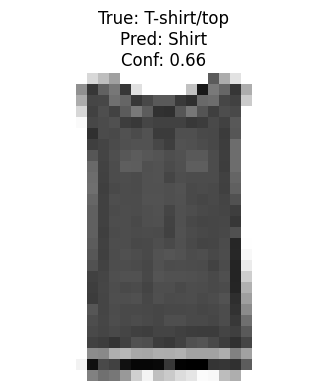

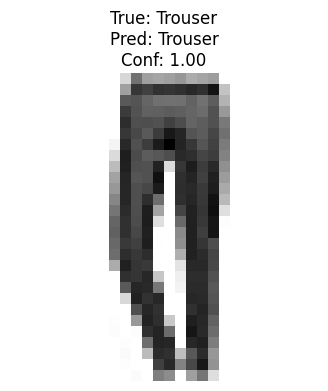

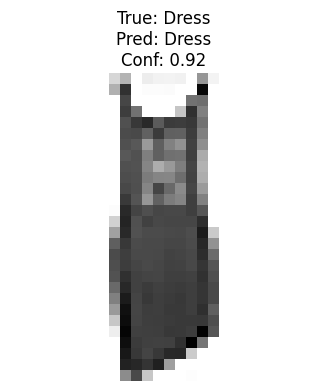

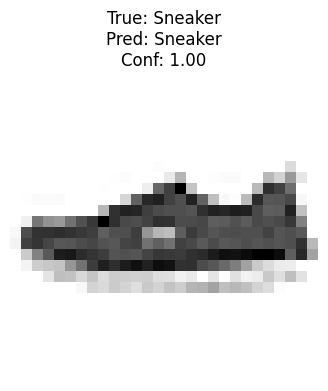

In [21]:
# Display the table with visualizations
for i, row in enumerate(data):
    plt.figure(figsize=(4, 4))
    plt.imshow(row["Image"], cmap=plt.cm.binary)
    plt.title(f"True: {row['True Label']}\nPred: {row['Predicted Label']}\nConf: {row['Confidence']:.2f}")
    plt.axis('off')
    plt.show()